In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

# Q1

In [2]:
# Read the earthquake data
eq = pd.read_csv('usgs_earthquakes.csv')

In [3]:
# Show the data
eq

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [4]:
eq_top = eq.sort_values('mag', ascending=False).head(50)
eq_top

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


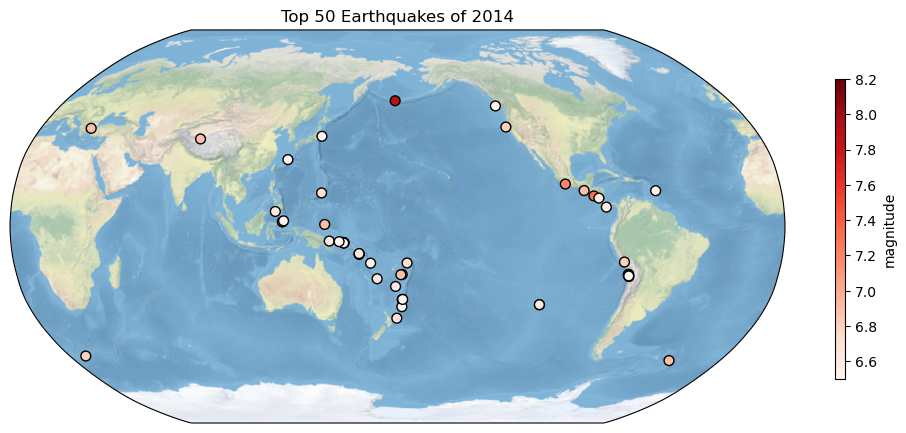

In [5]:
# Create and define the size of a figure object 
fig = plt.figure(figsize=(10, 10), dpi = 100)

# Set Robinson projection style
proj = ccrs.Robinson(central_longitude = 180) 

# Create an axes with Robinson projection style
ax1 = plt.axes(projection = proj)

# Plot the title and base map
ax1.set_global()
ax1.stock_img()
ax1.set_title('Top 50 Earthquakes of 2014')

# Plot the points
points = ax1.scatter(eq_top['longitude'].values, 
                     eq_top['latitude'].values, c = eq_top['mag'], 
                     cmap = 'Reds', edgecolors = 'k', s = 50, 
                     transform = ccrs.PlateCarree())

# Add the colorbar
ax2 = fig.add_axes([0.95, 0.35, 0.01, 0.3])
plt.colorbar(points, cax = ax2).set_label('magnitude')

# Q2

In [6]:
# Read the file
ds = xr.open_dataset('monthly_tem.nc', engine = 'netcdf4')

In [7]:
# Show the file
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, expver: 2, time: 142)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2021-10-01
Data variables:
    t2m        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-06 22:44:04 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [8]:
# Extract the latest data
t2m = ds.t2m.isel(time = -1)
t2m

<xarray.DataArray 't2m' (expver: 2, latitude: 721, longitude: 1440)>
[2076480 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
    time       datetime64[ns] 2021-10-01
Attributes:
    units:      K
    long_name:  2 metre temperature

## Q2.1

Text(109.355, 33.705, 'China')

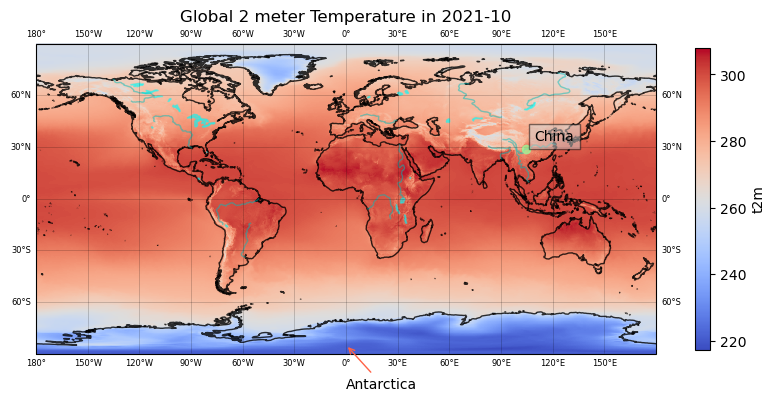

In [9]:
# Central latitude and longitude of China
clon, clat = 104.355, 28.705

# Create and define the size of a figure object 
fig = plt.figure(figsize = (10, 10), dpi = 100)

# Set PlateCarree projection style
proj = ccrs.PlateCarree() 

# Create an axes with PlateCarree projection style
ax = plt.axes(projection = proj)

# Add the gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, 
                  linewidth = 0.5, color = 'black', alpha = 0.25)

# Manipulate latitude and longitude gridline numbers and spacing
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))

# Set the sizes of labels
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}

# Add feature
ax.coastlines(resolution = '50m', color = 'k', alpha = 0.8)
ax.add_feature(cfeature.LAKES, color = 'cyan', alpha = 0.5)
ax.add_feature(cfeature.RIVERS, edgecolor = 'c', alpha = 0.5)

# Plot the data with colorbar
t2m.mean(dim = 'expver').plot(transform = ccrs.PlateCarree(), 
                              cbar_kwargs = {'shrink': 0.4}, cmap = 'coolwarm')

# Add the title
ax.set_title('Global 2 meter Temperature in 2021-10')

# Add annotation
ax.annotate('Antarctica', xy = (0, -85), xytext = (0, -110), 
           arrowprops = dict(arrowstyle = '->', color = 'tomato'))

# Add text box
ax.plot(clon, clat, 'o', color = 'palegreen', alpha = 0.7, 
        transform = ccrs.PlateCarree())
ax.text(clon + 5, clat + 5, 'China', color = 'k', 
        bbox = dict(facecolor = 'lightgrey', alpha = 0.5))

## Q2.2

Text(115.06, 23.54, 'Shenzhen')

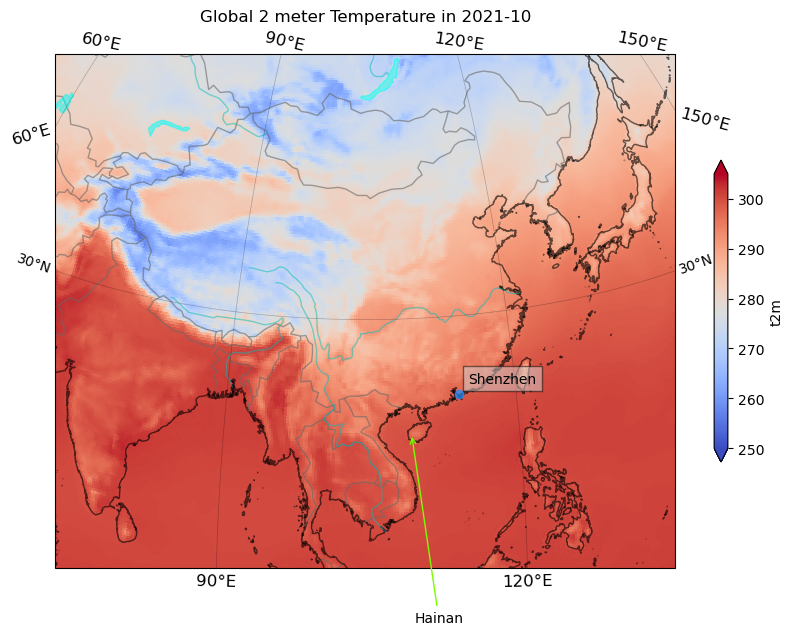

In [10]:
# Central latitude and longitude of China
clon, clat = 104.355, 28.705

# Create and define the size of a figure object 
fig = plt.figure(figsize = (10, 10), dpi = 100)

# Set Orthographic projection style
proj = ccrs.Orthographic(clon, clat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection = proj)

# Set a region and plot
extent = [clon - 31, clon + 31, clat - 25, clat + 25]
ax.set_extent(extent)

# Add the gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, 
                  linewidth = 0.5, color = 'black', alpha = 0.25)

# Manipulate latitude and longitude gridline numbers and spacing
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))

# Set the sizes of labels
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 10}

# Add feature
ax.coastlines(resolution = '10m', color = 'k', alpha = 0.6)
ax.add_feature(cfeature.BORDERS, edgecolor = 'dimgrey', alpha = 0.6)
ax.add_feature(cfeature.LAKES, color = 'cyan', alpha = 0.5)
ax.add_feature(cfeature.RIVERS, edgecolor = 'c', alpha = 0.5)

# Plot the data with colorbar
t2m.mean(dim = 'expver').plot(transform = ccrs.PlateCarree(), 
                              cbar_kwargs = {'shrink': 0.4}, cmap = 'coolwarm', 
                              vmax = 305, vmin = 250)

# Add the title
ax.set_title('Global 2 meter Temperature in 2021-10')

# Add annotation
ax.annotate('Hainan', xy = (109, 19), xytext = (109, 0), 
            xycoords = ccrs.PlateCarree()._as_mpl_transform(ax), 
            arrowprops = dict(arrowstyle = '->', color = 'lawngreen')
           )

# Central lon and lat at Shenzhen
slon, slat = 114.06, 22.54

# Add text box
ax.plot(slon, slat, 'o', color = 'dodgerblue', alpha = 0.7, 
        transform = ccrs.PlateCarree())
ax.text(slon + 1, slat + 1, 'Shenzhen', color = 'k', 
        bbox = dict(facecolor = 'lightgrey', alpha = 0.5), 
        transform = ccrs.PlateCarree())